# Исследование данных о продаже игр

В нашем распоряжении данные о продажах в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Нужно научиться определять рыночную стоимость объектов недвижимости. Нужно проанализировать данные, выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

Для этого мы проверим проведем предварительную обработку данных: приведем названия столбцов к нижнему регистру, преобразуем данные в нужные типы, обработаем пропуски. 

Затем проведем исследовательский анализ данных: посмотрим сколько игр продавалось в разные годы, определим изменения продаж платформ в разные годы и выясним, какие платформы с наибольшими суммарными продажами, выберем актуальный период и посмотрим на лидеров по продажам, узнаем на основании данных по наиболее популярной платформе влияют ли на продажи отзывы пользователей и критиков и постараемся определить наиболее прибыльные жанры игр.

После этого определим портрет пользователя каждого региона для чего выясним каждого региона самые популярные платформы, самые популярные жанры и влияет ли рейтинг ESRB на продажи в отдельном регионе.

Также проверим гипотезы о том, что:
1. средние пользовательские рейтинги платформ Xbox One и PC одинаковые
2. средние пользовательские рейтинги жанров Action и Sports разные

И в заключении напишем вывод о наиболее потенциальных платформах, жанрах игр и приоритетном рейтинге ESRB в каждом представленном регионе.

### Предварительная обработка данных. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.columns = data.columns.str.lower() # приведем названия столбцов к нижнему регистру

In [5]:
data.duplicated().sum()#проверим датасет на наличие дубликатов

0

In [6]:
data.isna().sum() #посмотрим в каких колонках присутствуют отсутствующие значения

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
data = data.dropna(subset=['name', 'year_of_release']) #удалим из колонок name, year_of_release строки со значением NaN

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Изменим тип колонки year_of_release на int, так там присутствует только год выпуска.

In [9]:
data['year_of_release'] = data['year_of_release'].convert_dtypes()

Поменяем тип колонки user_score на float.

In [10]:
data['user_score'].describe()

count     9839
unique      96
top        tbd
freq      2376
Name: user_score, dtype: object

В колонке user_score довольно часто (14% от общего количества строк) встречается сочетание букв tbd. Скорее всего это аббревиатура, которая означает "To Be Determined" или "Будет определено", и смысл её в том, что результат на данный момент неизвестен. Наличие этого значения в колонке не позволит изменить тип данных, поэтому присвоим этому значение NaN.

In [11]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

В столбцах critic_score, user_score, rating присутствует довольно много значений NaN. Нужно проанализировать их возможное происхождение и решить, что с ними делать.

In [12]:
data.groupby(['year_of_release']).agg({'rating': 'count'}).reset_index()

,year_of_release,rating
0,1980,0
1,1981,0
2,1982,0
3,1983,0
4,1984,0
5,1985,1
6,1986,0
7,1987,0
8,1988,1
9,1989,0


В колонке rating в основном отсутствующие значения находятся в строках с годом выпуска игр до 1996 года, так как сама организация ESRB начала работу в 1994 году. Удалять строки со значением NaN и заполнять их какими либо другими значениями будет некорректно, поэтому оставим как есть, а для исследования влияния рейтинга на продажи будем использовать строки с ненулевыми значениями в колонке rating.

In [13]:
data.groupby(['year_of_release']).agg({'critic_score': sum}).reset_index()

,year_of_release,critic_score
0,1980,0.0
1,1981,0.0
2,1982,0.0
3,1983,0.0
4,1984,0.0
5,1985,59.0
6,1986,0.0
7,1987,0.0
8,1988,64.0
9,1989,0.0


In [14]:
data.groupby(['year_of_release']).agg({'user_score': sum}).reset_index()

,year_of_release,user_score
0,1980,0.0
1,1981,0.0
2,1982,0.0
3,1983,0.0
4,1984,0.0
5,1985,5.8
6,1986,0.0
7,1987,0.0
8,1988,2.2
9,1989,0.0


In [15]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Ситуация с отсутствующими значениями в колонках critic_score, user_score очень похожа на то, что мы видим в колонке rating. Получается, что до 1996 года не была распространена практика оценивания игр критиками и игроками. Нельзя удалить строки с нулевыми значениями, так как их довольно много (порядка 55%). Поставим на эти значения "заглушки" в виде отрицательного числа. В колонке rating заменим отсутствующие значения сочетанием 'no_rating'.

In [16]:
data['user_score'] = data['user_score'].fillna(-1)
data['critic_score'] = data['critic_score'].fillna(-1)
data['rating'] = data['rating'].fillna('no_rating')

Посчитаем сколько игр было выпущено в разные годы.

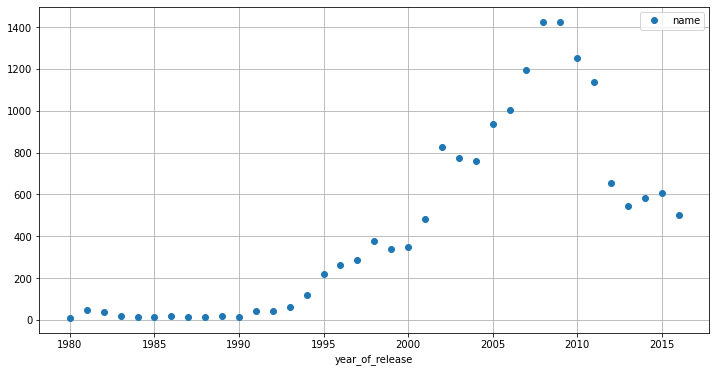

In [17]:
data.groupby('year_of_release').agg({'name': 'count'}).reset_index().plot(x='year_of_release', y='name',
                   style='o', figsize=(12, 6),alpha=1, grid=True);

На данном графике видим, что количество выпущенных игр было примерно на одном уровне до 1990 года, затем наблюдается значительный рост до 1400 игр в год к 2008-2009 годам и потом произошел довольно резкий спад. Примерно в 2012-2013 году падение остановилось, к 2015 году был небольшой рост и снова падение до 500 игр в год.

Подсчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [18]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

### Исследовательский анализ данных.

In [19]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

In [20]:
platform_sales_sum = data.groupby('platform').agg({'total_sales': 'sum'}).reset_index()
platform_sales_sum.sort_values(by='total_sales', ascending=False).reset_index()

,index,platform,total_sales
0,16,PS2,1233.56
1,28,X360,961.24
2,17,PS3,931.34
3,26,Wii,891.18
4,4,DS,802.78
5,15,PS,727.58
6,18,PS4,314.14
7,6,GBA,312.88
8,19,PSP,289.53
9,2,3DS,257.81


Насчитывается 31 вид игровых платформ. Посмотрим на количество продаж игр для разных платформ с помощью диаграммы.

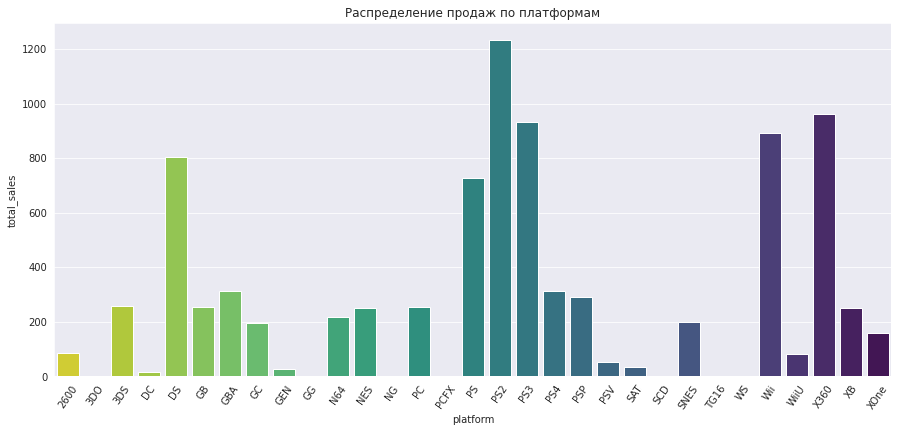

In [21]:
plt.figure(figsize=(15,6.5))
sns.set_style('darkgrid')
g = sns.barplot(data=platform_sales_sum, x='platform', y='total_sales', ci=False, palette='viridis_r')
g.set_xticklabels(platform_sales_sum['platform'], rotation=55, fontdict={'fontsize':10})
plt.title('Распределение продаж по платформам')
plt.show()

Судя по диаграмме самая популярная игровая платформа PS2, затем с отставанием почти в 25% идут PS3, X360 и Wii. Далее еще немного от них отстают Nintendo DS и PS. Продажи игр для остальных игровых платформ гораздо ниже по сравнению с лидерами: порядка 15-20% от лидера. Однозначным лидером по продаже игр для своих платформ является Sony, следом за ней идут Microsoft и Nintendo. Удивило, что очень скромные показатели продаж у игр для персональных компьютеров. Скорее всего связано это с тем, что эти игры довольно легко взламываются и пользователи получают их нелегально.

Наиболее популярными, судя по продажам, лидерами являются 5 игровых платформ: PS2, X360, PS3, Wii и DS. Рассмотрим динамику продаж игр для этих платформ.

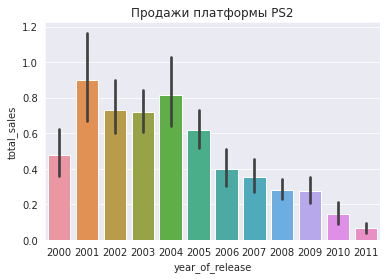

In [22]:
platform_sales_years = data[['year_of_release', 'platform', 'total_sales']]
platform_sales_years_ps2 = platform_sales_years[
    (platform_sales_years['platform'] == 'PS2')].sort_values(by=['year_of_release'], ascending=True)
sns.barplot(x='year_of_release', y='total_sales', data=platform_sales_years_ps2).set(title='Продажи платформы PS2');

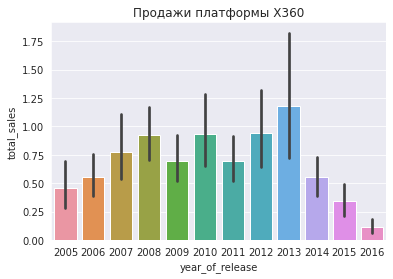

In [23]:
platform_sales_years_X360 = platform_sales_years[
    (platform_sales_years['platform'] == 'X360')].sort_values(by=['year_of_release'], ascending=True)
sns.barplot(x='year_of_release', y='total_sales', data=platform_sales_years_X360).set(title='Продажи платформы X360');

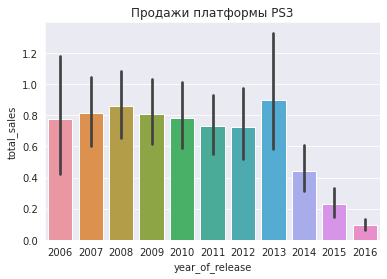

In [24]:
platform_sales_years_PS3 = platform_sales_years[
    (platform_sales_years['platform'] == 'PS3')].sort_values(by=['year_of_release'], ascending=True)
sns.barplot(x='year_of_release', y='total_sales', data=platform_sales_years_PS3).set(title='Продажи платформы PS3');

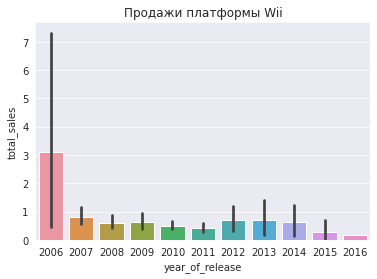

In [25]:
platform_sales_years_Wii = platform_sales_years[
    (platform_sales_years['platform'] == 'Wii')].sort_values(by=['year_of_release'], ascending=True)
sns.barplot(x='year_of_release', y='total_sales', data=platform_sales_years_Wii).set(title='Продажи платформы Wii');

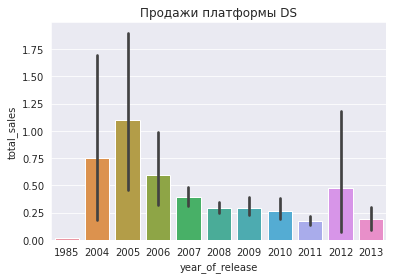

In [26]:
platform_sales_years_DS = platform_sales_years[
    (platform_sales_years['platform'] == 'DS')].sort_values(by=['year_of_release'], ascending=True)
sns.barplot(x='year_of_release', y='total_sales', data=platform_sales_years_DS).set(title='Продажи платформы DS');

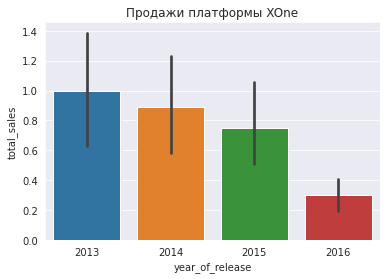

In [27]:
platform_sales_years_XOne = platform_sales_years[
    (platform_sales_years['platform'] == 'XOne')].sort_values(by=['year_of_release'], ascending=True)
sns.barplot(x='year_of_release', y='total_sales', data=platform_sales_years_XOne).set(title='Продажи платформы XOne');

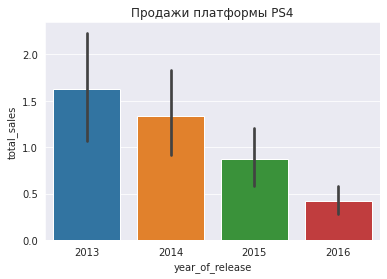

In [28]:
platform_sales_years_PS4 = platform_sales_years[
    (platform_sales_years['platform'] == 'PS4')].sort_values(by=['year_of_release'], ascending=True)
sns.barplot(x='year_of_release', y='total_sales', data=platform_sales_years_PS4).set(title='Продажи платформы PS4');

Судя по представленным диаграммам продаж игр можно сказать, что в среднем срок активных продаж составляет 10 лет. Общей тенденции в характере продаж не видно. Игры для некоторых платформ показывают рост продаж в течение 1-3 лет от выпуска приставки, игры для Wii провалились после года продаж. Затем диаграммы показывают плавное снижение продаж на протяжении 8-9 лет. Наблюдается резкий рост продаж игр для некоторых платформ через 5-7 лет после вывода приставки на рынок (DS, PS3, X360). Скорее всего это связано с выходом платформы нового поколения (PS4, XOne). Из представленного можно сделать вывод: продажи игр для новой приставки будут расти на протяжении 1-3 лет с даты выпуска этой приставки на рынок, затем наблюдается плавный спад продаж и новый рост возможен с выходом платформы нового поколения. В среднем срок использования новой платформы 9-11 лет. Хотя, в связи с развитием технологий, возможно этот срок будет сокращаться, так как пользователь становится более требовательным к качеству выпускаемых игр. Еще раз посмотрим на ситуацию с лидерами продаж при этом возьмем период с 2013 года, так как в 2013 году выпущены приставки последнего поколения PS4 и Xbox One, а согласно нашему выводу рост продаж игр наблюдается как раз с выходом новой платформы.

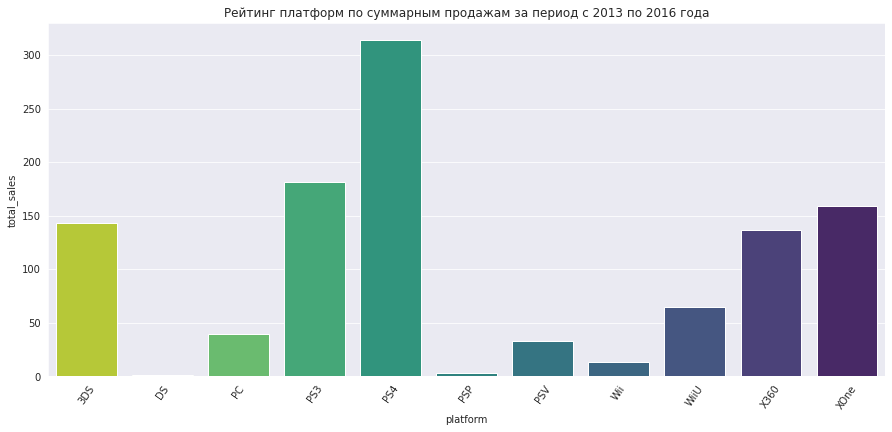

In [29]:
data = data.query('year_of_release >= 2013')
platform_sales_sum = data.groupby('platform').agg({'total_sales': 'sum'}).reset_index()
plt.figure(figsize=(15,6.5))
sns.set_style('darkgrid')
g = sns.barplot(data=platform_sales_sum, x='platform', y='total_sales', ci=False, palette='viridis_r')
g.set_xticklabels(platform_sales_sum['platform'], rotation=55, fontdict={'fontsize':10})
plt.title('Рейтинг платформ по суммарным продажам за период с 2013 по 2016 года')
plt.show()

Для прогнозирования выпуска возможного наиболее перспективного продукта, а также планирования рекламной компании нужно выбрать более коммерчески успешные платформы, а также выпущенные игры для них за последние 5-7 лет. При этом необходимо учесть вывод о том, что рост продаж для платформы приходится на период 1-3 года от выпуска этой платформы на рынок. Посмотрим на диаграммы размаха.

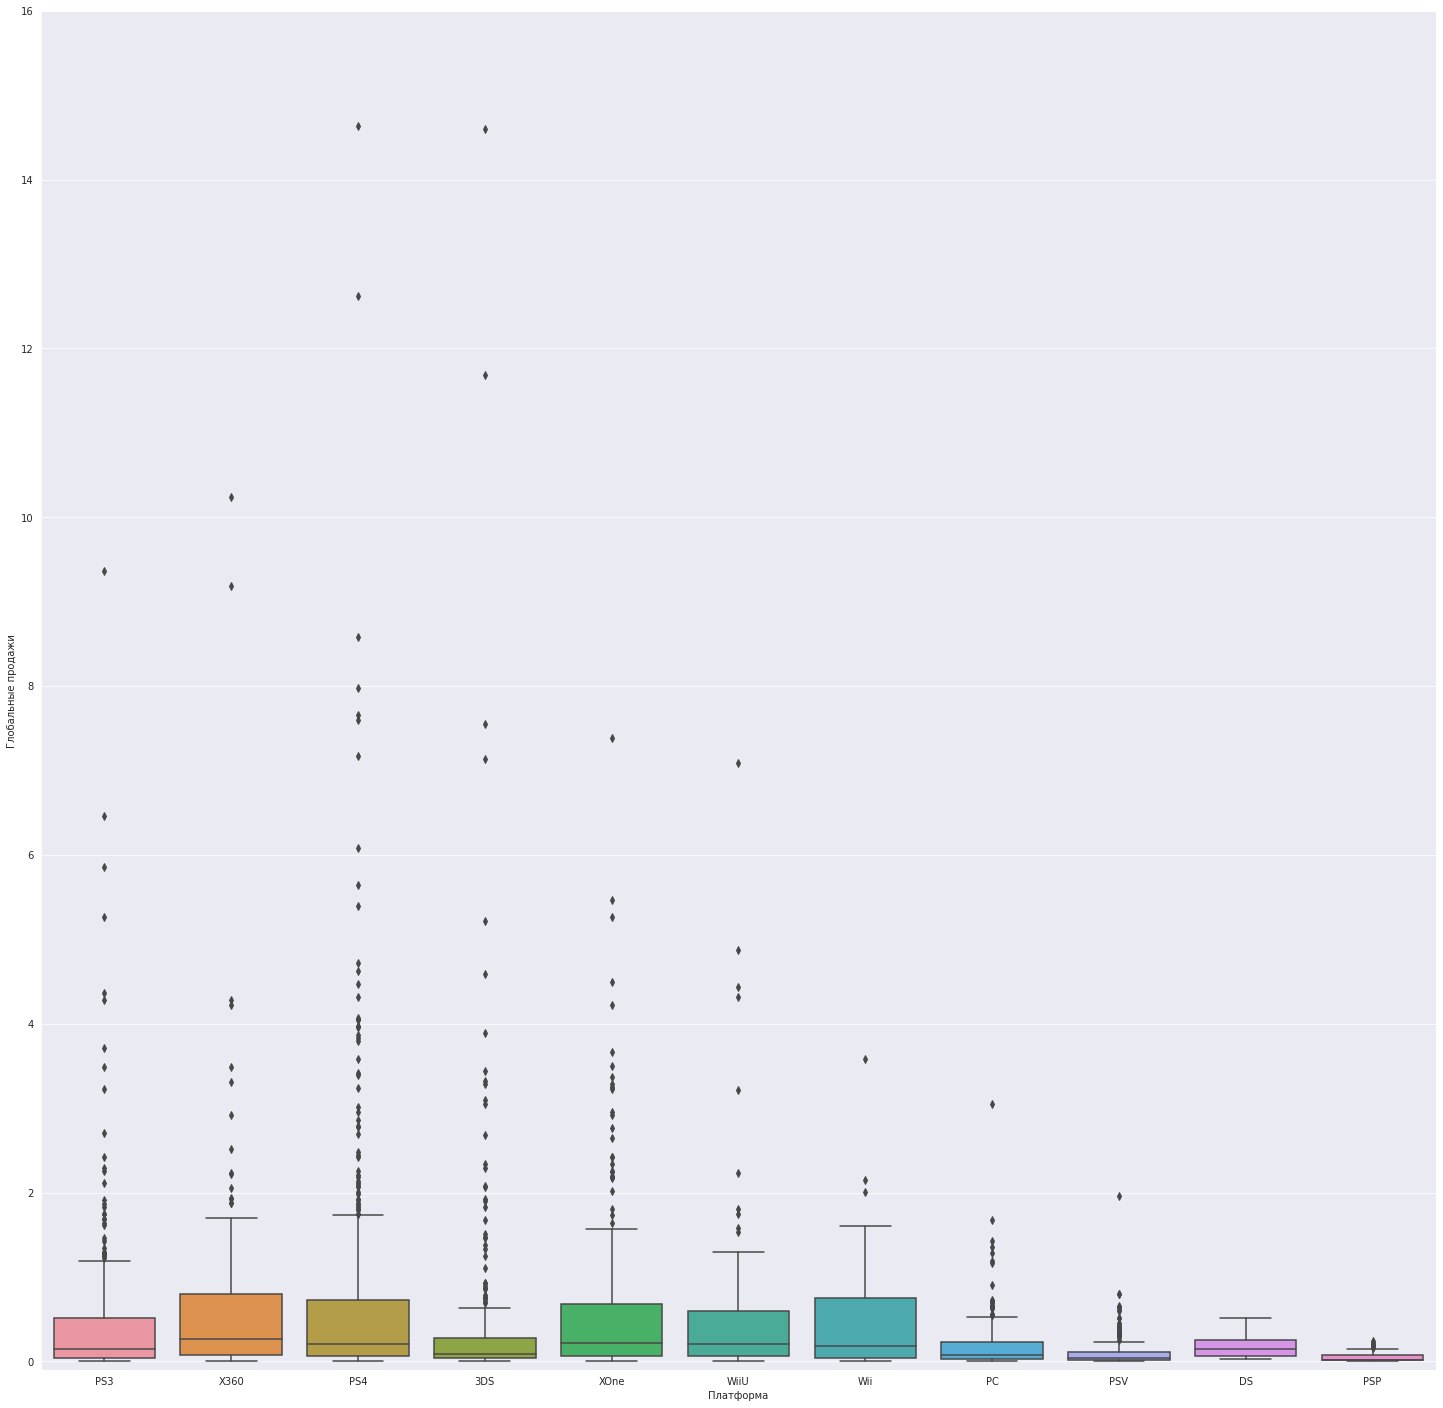

In [30]:
plt.figure(figsize = (25, 25))
sns.boxplot(data = data, y='total_sales', x='platform');
plt.ylim(-0.1, 16)
plt.ylabel('Глобальные продажи')
plt.xlabel('Платформа')
plt.show()

In [31]:
data['total_sales'].describe()

count    2233.000000
mean        0.488442
std         1.235226
min         0.010000
25%         0.030000
50%         0.110000
75%         0.400000
max        21.050000
Name: total_sales, dtype: float64

На диаграмме мы видим большие выбросы, наиболее аномальные у платформ PS4, 3DS, X360 и PS3. Уберем строки с большими выбросами. Границы ящика составляют 0,4 и 0,03, межквартильное расстояние 0,37. Определим границу для критических выбросов как три межквартильных расстояния 0,37*3 и удалим строки со значением, превышающим полученное число.

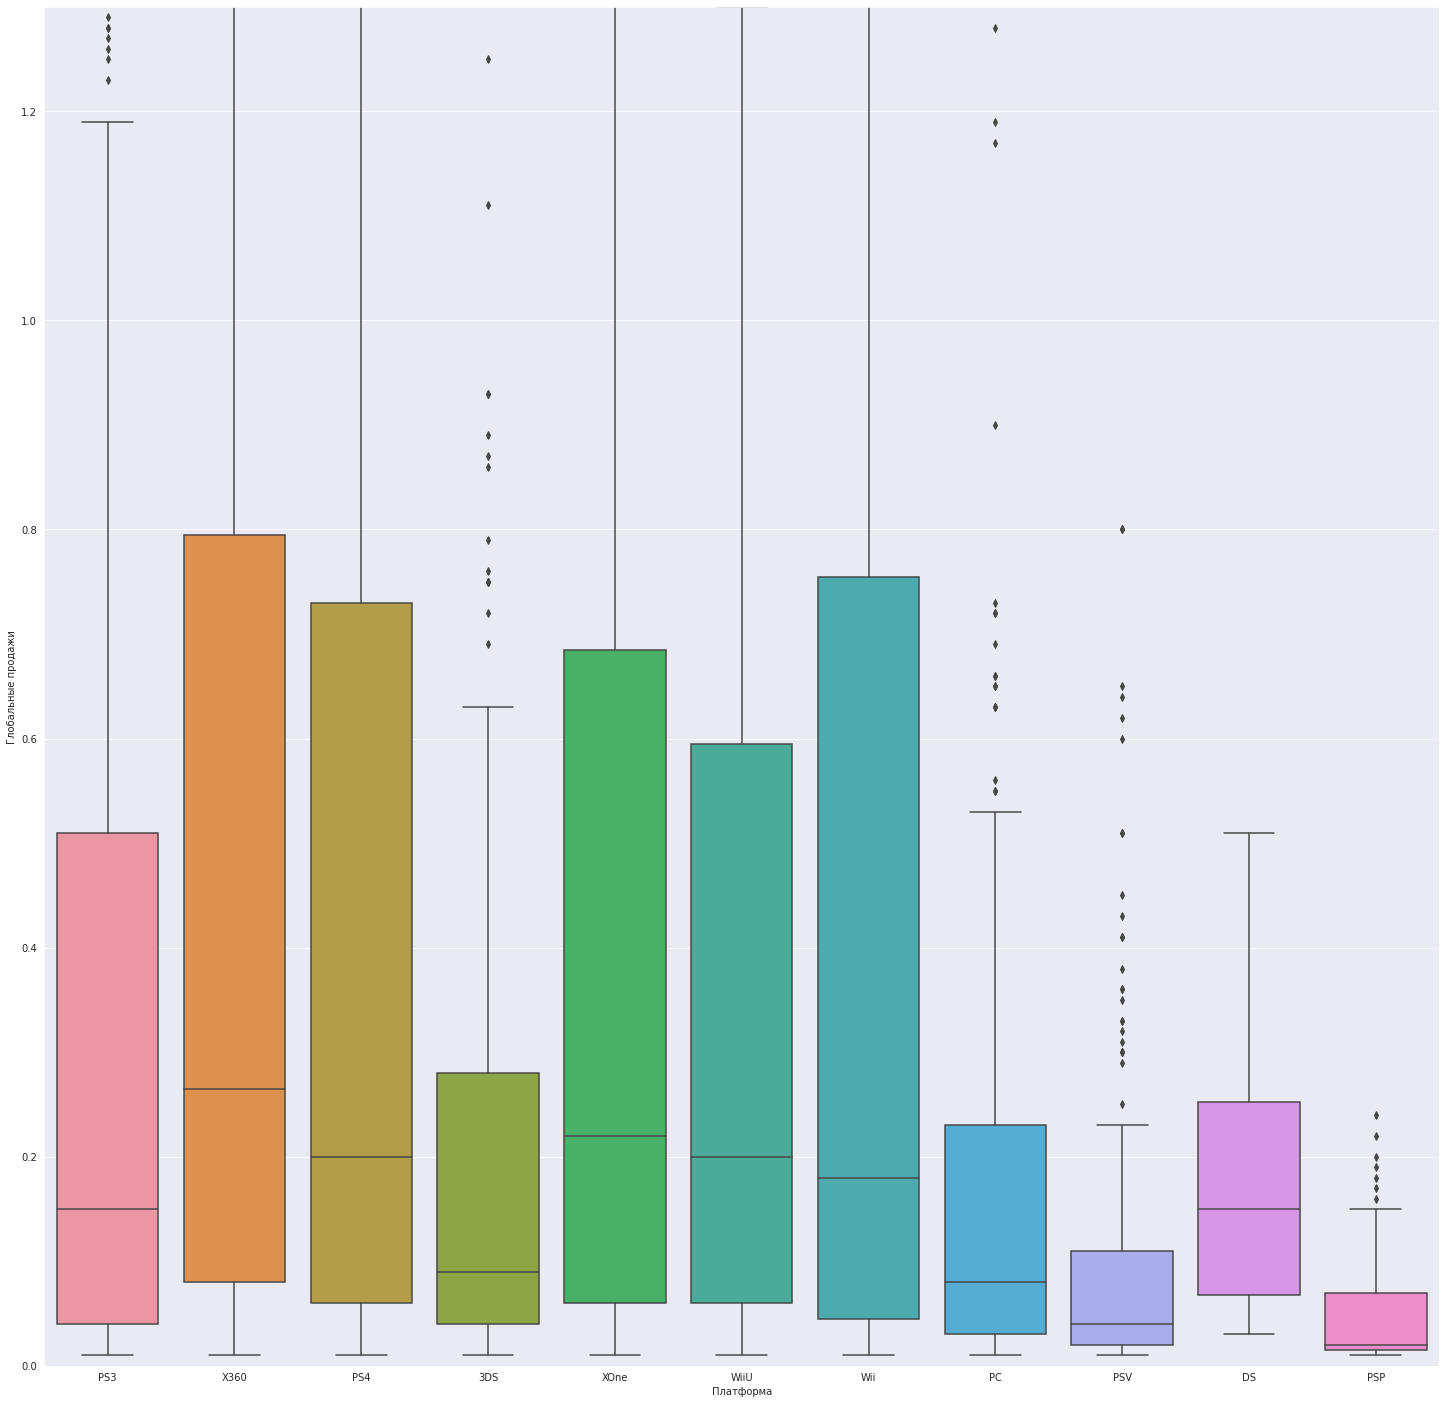

In [34]:
plt.figure(figsize = (25, 25))
sns.boxplot(data = data, y='total_sales', x='platform');
plt.ylim(0, 1.3)
plt.ylabel('Глобальные продажи')
plt.xlabel('Платформа')
plt.show()

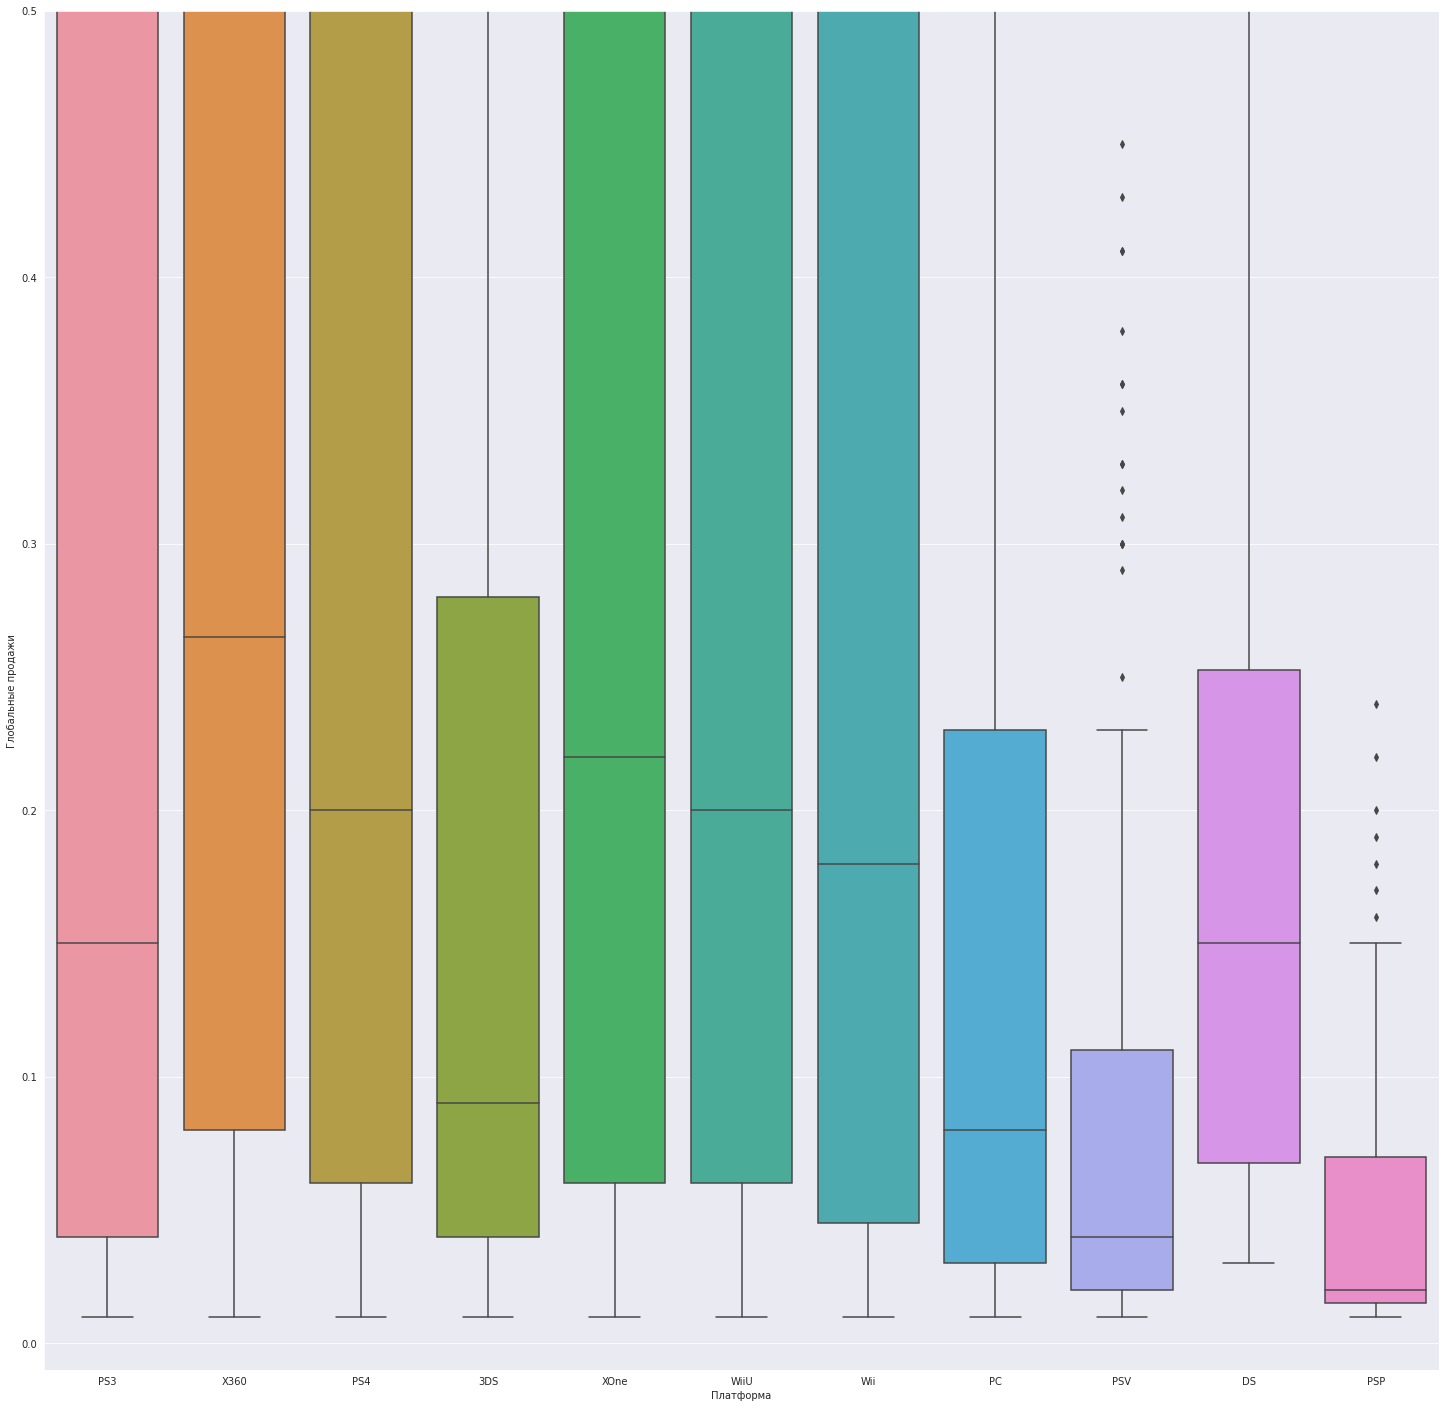

In [35]:
plt.figure(figsize = (25, 25))
sns.boxplot(data = data, y='total_sales', x='platform');
plt.ylim(-0.01, 0.5)
plt.ylabel('Глобальные продажи')
plt.xlabel('Платформа')
plt.show()

In [36]:
data['total_sales'].describe()

count    2233.000000
mean        0.488442
std         1.235226
min         0.010000
25%         0.030000
50%         0.110000
75%         0.400000
max        21.050000
Name: total_sales, dtype: float64

По представленным диаграммам размаха мы видим, что если в сравнении наиболее популярными платформами являются X360, XOne от Microsoft, а также платформы от Nintendo: Wii, WiiU, DS. А у платформ от Sony (PS3и PS4) наблюдаются довольно большие выбросы, которые искажают представление о сумме продаж, если смотреть на них в простом сравнении.

Теперь посмотрим на влияние оценок экспертов и игроков на продажи игр на примере самой популярной приставки X360.

In [37]:
# Комментарий ревьюера 2
print(len(data.query('critic_score > 0')))
print(len(data.query('user_score > 0')))
print(len(data.query('critic_score > 0 and user_score > 0')))

991
1192
976


0.3503445460228664

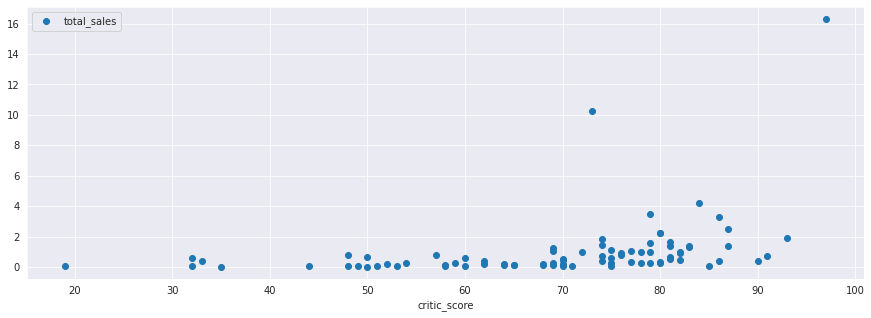

In [38]:
total_sales_x360_critic = data.query('platform == "X360" and critic_score > 0')
total_sales_x360_critic.plot(x='critic_score', y='total_sales', style='o', figsize=(15, 5), grid=True);
total_sales_x360_critic['critic_score'].corr(total_sales_x360_critic['total_sales'])

-0.011742185147181342

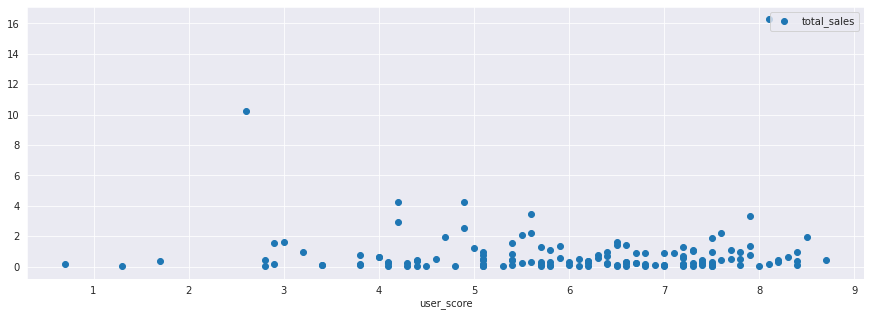

In [39]:
total_sales_x360_user = data.query('platform == "X360" and user_score > 0')
total_sales_x360_user.plot(x='user_score', y='total_sales', style='o', figsize=(15, 5), grid=True);
total_sales_x360_user['user_score'].corr(total_sales_x360_user['total_sales'])

На диаграммах по платформе X360 мы видим, что прослеживается зависимость продаж от экспертных оценок игр. Об этом же говорит значение корреляции. В отличие от оценок самих игроков, которые на продажи игр имеют гораздо меньшее влияние.

0.3764149065423912

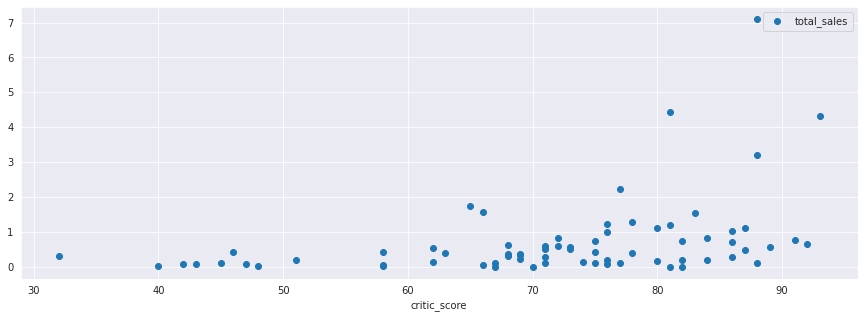

In [40]:
total_sales_wiiu_critic = data.query('platform == "WiiU" and critic_score > 0')
total_sales_wiiu_critic.plot(x='critic_score', y='total_sales', style='o', figsize=(15, 5), grid=True);
total_sales_wiiu_critic['critic_score'].corr(total_sales_wiiu_critic['total_sales'])

0.4193304819266187

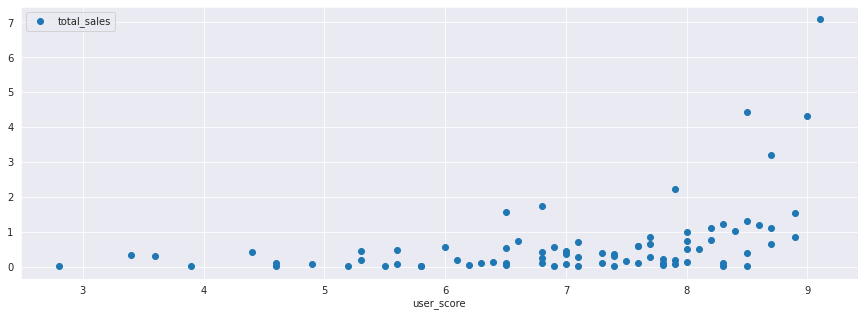

In [41]:
total_sales_wiiu_user = data.query('platform == "WiiU" and user_score > 0')
total_sales_wiiu_user.plot(x='user_score', y='total_sales', style='o', figsize=(15, 5), grid=True);
total_sales_wiiu_user['user_score'].corr(total_sales_wiiu_user['total_sales'])

0.4169983280084017

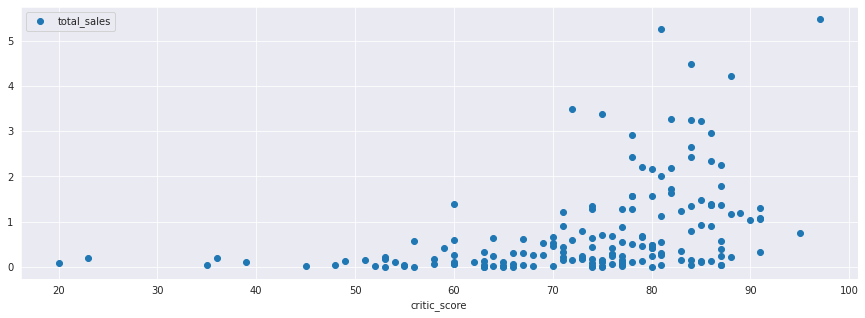

In [42]:
total_sales_xone_critic = data.query('platform == "XOne" and critic_score > 0')
total_sales_xone_critic.plot(x='critic_score', y='total_sales', style='o', figsize=(15, 5), grid=True);
total_sales_xone_critic['critic_score'].corr(total_sales_xone_critic['total_sales'])

-0.06892505328279414

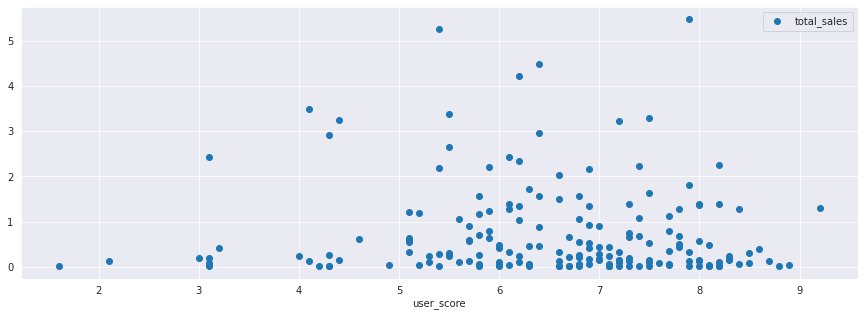

In [43]:
total_sales_xone_user = data.query('platform == "XOne" and user_score > 0')
total_sales_xone_user.plot(x='user_score', y='total_sales', style='o', figsize=(15, 5), grid=True);
total_sales_xone_user['user_score'].corr(total_sales_xone_user['total_sales'])

0.40656790206178095

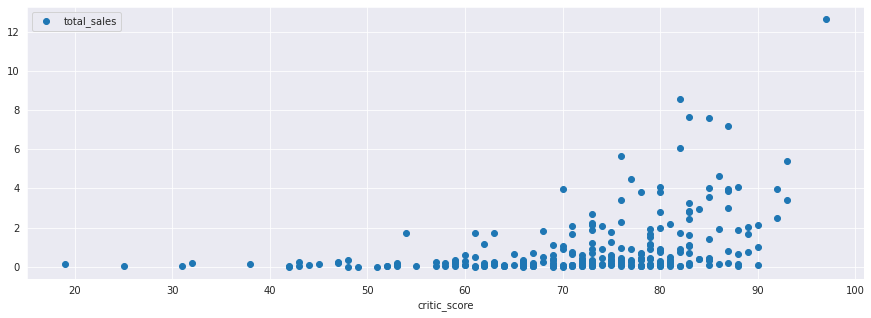

In [44]:
total_sales_ps4_critic = data.query('platform == "PS4" and critic_score > 0')
total_sales_ps4_critic.plot(x='critic_score', y='total_sales', style='o', figsize=(15, 5), grid=True);
total_sales_ps4_critic['critic_score'].corr(total_sales_ps4_critic['total_sales'])

-0.031957110204556376

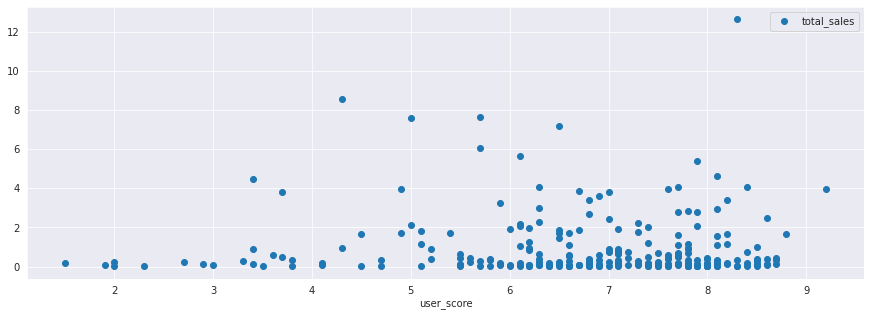

In [45]:
total_sales_ps4_user = data.query('platform == "PS4" and user_score > 0')
total_sales_ps4_user.plot(x='user_score', y='total_sales', style='o', figsize=(15, 5), grid=True);
total_sales_ps4_user['user_score'].corr(total_sales_ps4_user['total_sales'])

0.3136995151027371

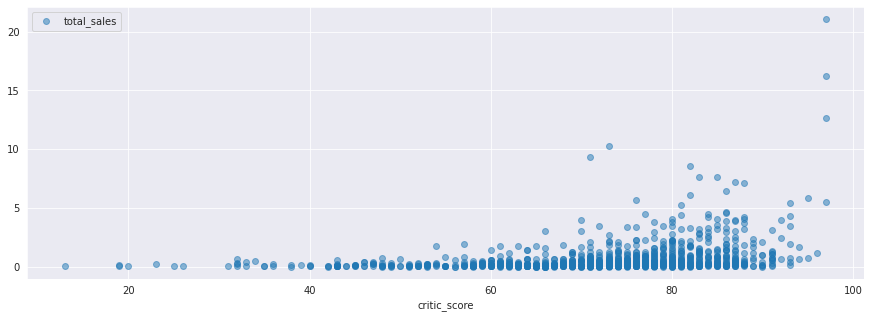

In [46]:
data_corr_critic = data.query('critic_score > 0')
data_corr_critic.plot(x='critic_score', y='total_sales', style='o', figsize=(15, 5),alpha=0.5, grid=True);
data_corr_critic['critic_score'].corr(data_corr_critic['total_sales'])

-0.0026078133545982744

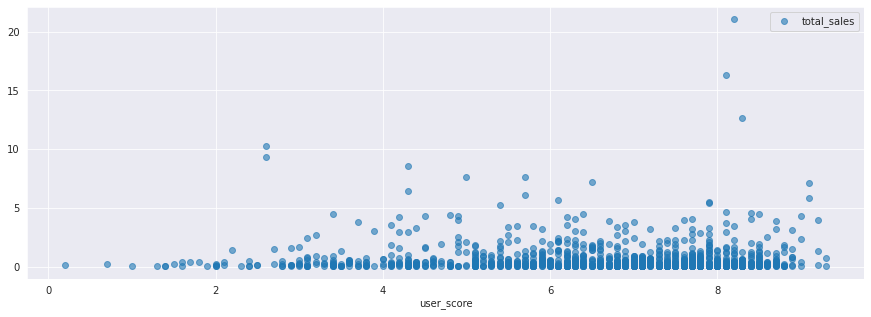

In [47]:
data_corr_user = data.query('user_score > 0')
data_corr_user.plot(x='user_score', y='total_sales', style='o', figsize=(15, 5),alpha=0.6, grid=True);
data_corr_user['user_score'].corr(data_corr_user['total_sales'])

Если смотреть на диаграммы рассеяния и расчет корреляции по другим популярным платформам и в целом по данным выбранного периода, то ситуация схожа с выводами по платформе Xbox360: в основном влияние мнения экспертов на продажи сильнее, чем оценки игроков. Однако если посмотреть на платформу WiiU, то там влияние оценок игроков даже немного выше, чем мнение экспертов

Теперь рассмотрим какие жанры в играх наиболее продаваемые.

In [49]:
genre_sales_sum = data.groupby('genre').agg({'total_sales': 'sum'}).reset_index()
genre_sales_sum.sort_values(by='total_sales', ascending=False).reset_index()

,index,genre,total_sales
0,0,Action,321.87
1,8,Shooter,232.98
2,10,Sports,150.65
3,7,Role-Playing,145.89
4,3,Misc,62.82
5,4,Platform,42.63
6,6,Racing,39.89
7,2,Fighting,35.31
8,1,Adventure,23.64
9,9,Simulation,21.76


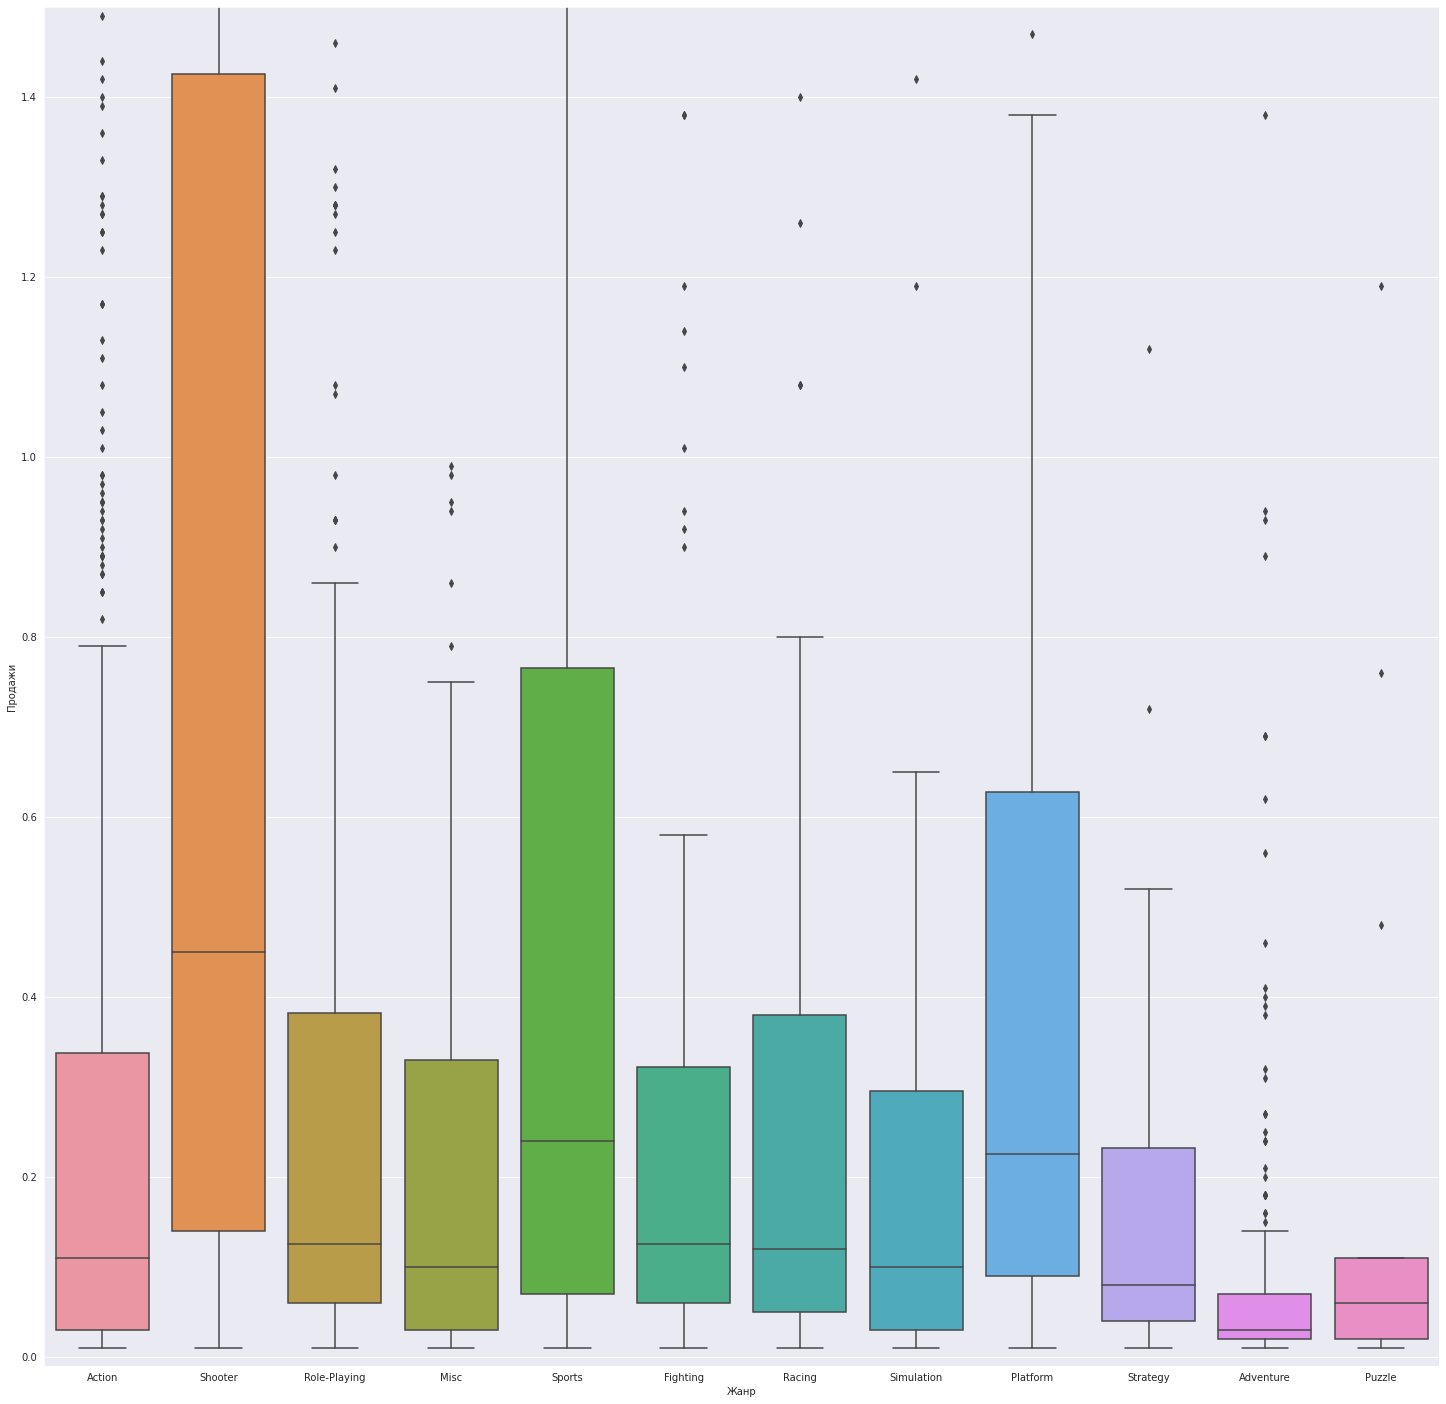

In [50]:
plt.figure(figsize = (25, 25))
sns.boxplot(data = data, y='total_sales', x='genre');
plt.ylim(-0.01, 1.5)
plt.ylabel('Продажи')
plt.xlabel('Жанр')
plt.show()

Если смотреть на ситуацию с популярными жанрами с позиции медианных продаж, нежели с суммы продаж, то видим, что наиболее популярным жанром является shooter. На втором месте идут игры в жанре sports и третье место занимает уверенно жанр platform. В остальных жанровых предпочтениях игроков положение довольно ровное, явными аутсайдерами выступают puzzle и adventure.

### Портрет пользователя каждого региона.

Далее определим наиболее популярные платформы и жанры в разрезе каждого региона, а также влияние рейтинга ESRB на продажи в отдельном регионе.

In [51]:
data_sales = data[['genre', 'platform', 'na_sales', 'eu_sales', 'jp_sales', 'rating']].reset_index(drop=True)

In [61]:
data_na_sales = data_sales.groupby('platform').agg({'na_sales': 'sum'}).reset_index()
data_na_sales['platform'] = np.where((data_na_sales.na_sales < 12),'others', data_na_sales.platform)
data_na_sales_platform = data_na_sales.groupby('platform').agg({'na_sales':'sum'})

data_eu_sales = data_sales.groupby('platform').agg({'eu_sales': 'sum'}).reset_index()
data_eu_sales['platform'] = np.where((data_eu_sales.eu_sales < 14),'others', data_eu_sales.platform)
data_eu_sales_platform = data_eu_sales.groupby('platform').agg({'eu_sales':'sum'})

data_jp_sales = data_sales.groupby('platform').agg({'jp_sales': 'sum'}).reset_index()
data_jp_sales['platform'] = np.where((data_jp_sales.jp_sales < 3.8),'others', data_jp_sales.platform)
data_jp_sales_platform = data_jp_sales.groupby('platform').agg({'jp_sales':'sum'})

,eu_sales
platform,
3DS,30.96
PC,25.36
PS3,67.81
PS4,141.09
WiiU,19.85
X360,42.52
XOne,51.59
others,13.05


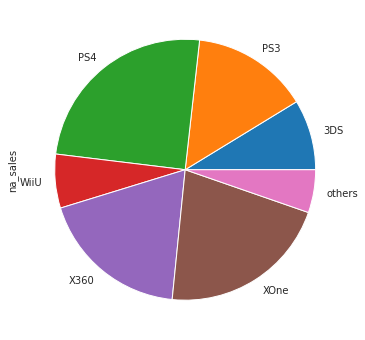

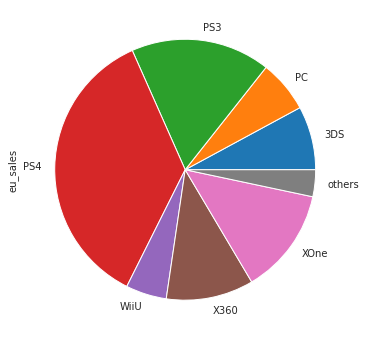

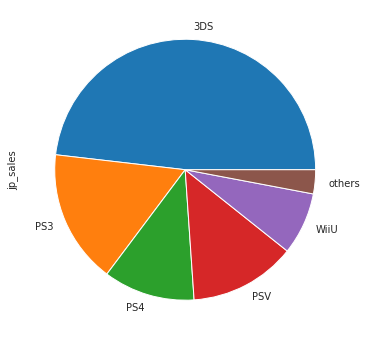

In [53]:
data_na_sales_platform.plot(y='na_sales', kind='pie', figsize=(6, 6), legend=False);
data_eu_sales_platform.plot(y='eu_sales', kind='pie', figsize=(6, 6), legend=False);
data_jp_sales_platform.plot(y='jp_sales', kind='pie', figsize=(6, 6), legend=False);

Судя по представленным диаграммам в Северной Америке явного лидера среди популярных платформ не наблюдается. Там в топ 5 входят приставки от Microsoft (X360, XOne) и от Sony (PS3, PS4), отстает от них WiiU. В Европе определенно в лидерах PS4 и PS3, немного отстают от них персональные компьютеры и X360, XOne. В Японии очень популярна платформа 3DS, а со второго по четвертое место занимают приставки от Sony (PS3, PSV, PS4), замыкает группу лидеров WiiU. Также бросается в глаза то, что в Японии, в отличие от Америки и Европы, очень малую долю занимает группа платформ, которые не вошли в топ 5.

In [54]:
data_na_sales = data_sales.groupby('genre').agg({'na_sales': 'sum'}).reset_index()
data_na_sales['genre'] = np.where((data_na_sales.na_sales < 12),'others', data_na_sales.genre)
data_na_sales_genre = data_na_sales.groupby('genre').agg({'na_sales':'sum'})

data_eu_sales = data_sales.groupby('genre').agg({'eu_sales': 'sum'}).reset_index()
data_eu_sales['genre'] = np.where((data_eu_sales.eu_sales < 8),'others', data_eu_sales.genre)
data_eu_sales_genre = data_eu_sales.groupby('genre').agg({'eu_sales':'sum'})

data_jp_sales = data_sales.groupby('genre').agg({'jp_sales': 'sum'}).reset_index()
data_jp_sales['genre'] = np.where((data_jp_sales.jp_sales < 4.8),'others', data_jp_sales.genre)
data_jp_sales_genre = data_jp_sales.groupby('genre').agg({'jp_sales':'sum'})

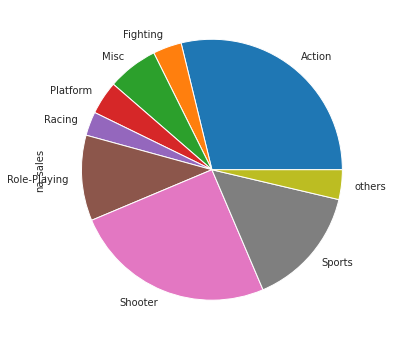

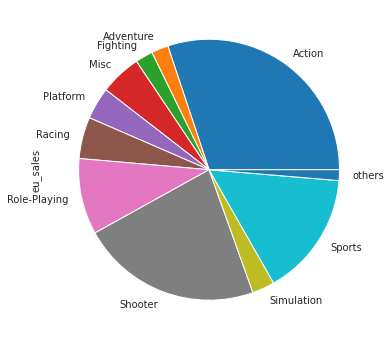

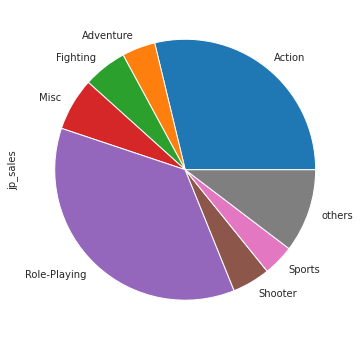

In [55]:
data_na_sales_genre.plot(y='na_sales', kind='pie', figsize=(6, 6), legend=False);
data_eu_sales_genre.plot(y='eu_sales', kind='pie', figsize=(6, 6), legend=False);
data_jp_sales_genre.plot(y='jp_sales', kind='pie', figsize=(6, 6), legend=False);

Исследование жанровых предпочтений показало, что во всех регионах самый популярный жанр - action. В Америке также очень любят жанр sport и вслед за ним идет shooter, потом rpg, misc и другие жанры. В Европе shooter более популярен, чем sport, на четвертом месте стоит role-playing и на пятом racing. В Японии ситуация с жанровыми предпочтениями, кроме схожести в подавляющей популярности action, очень сильно отлячается от других регионов: там на втором месте по популярности с большим отрывом от третьего места стоит rpg и с третьего по пятое место располагаются misc, adventure и sports. Также в Японии наблюдается значительно ментший интерес к другим жанрам по сравнению с Европой и Америкой.

In [56]:
data_na_sales = data_sales.groupby('rating').agg({'na_sales': 'sum'}).reset_index()
data_na_sales['rating'] = np.where((data_na_sales.na_sales < 5),'others', data_na_sales.rating)
data_na_sales_rating = data_na_sales.groupby('rating').agg({'na_sales':'sum'})

data_eu_sales = data_sales.groupby('rating').agg({'eu_sales': 'sum'}).reset_index()
data_eu_sales['rating'] = np.where((data_eu_sales.eu_sales < 4),'others', data_eu_sales.rating)
data_eu_sales_rating = data_eu_sales.groupby('rating').agg({'eu_sales':'sum'})

data_jp_sales = data_sales.groupby('rating').agg({'jp_sales': 'sum'}).reset_index()
data_jp_sales['rating'] = np.where((data_jp_sales.jp_sales < 2),'others', data_jp_sales.rating)
data_jp_sales_rating = data_jp_sales.groupby('rating').agg({'jp_sales':'sum'})

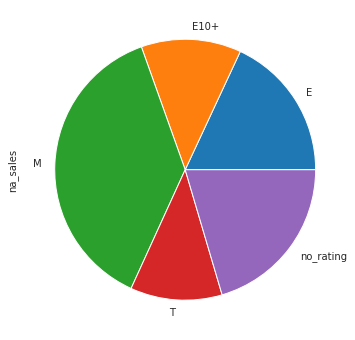

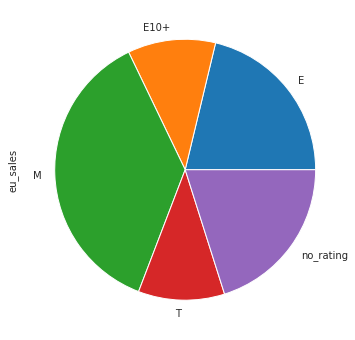

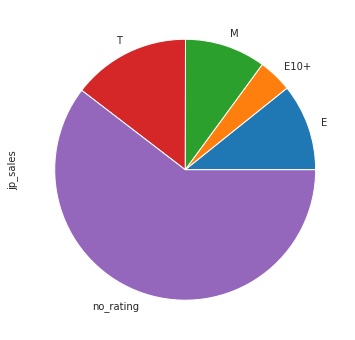

In [57]:
data_na_sales_rating.plot(y='na_sales', kind='pie', figsize=(6, 6), legend=False);
data_eu_sales_rating.plot(y='eu_sales', kind='pie', figsize=(6, 6), legend=False);
data_jp_sales_rating.plot(y='jp_sales', kind='pie', figsize=(6, 6), legend=False);

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Это пример, когда пропуски в датасете имеют значение. В Японии свой рейтинг и им мало интересны игры с Северо-Американским рейтингом. А есть еще рейтинги ЕС, отдельно в Германии, в Австралии и т.д. Но у нас нет по ним данным и в данном случае пропуск является признаком, что игра имеет другой рейтинг и выпускалась не в Северной Америке.</font>

Что касается наиболее популярных рейтингов, то в Северной Америке и Европе наблюдается практически идентичная картина: лучше всего продаются игры с рейтингом М (для взрослых), следом идут игры для детей старше 10 лет и затем игры для подростков и с рейтингом Е (для всех, в том числе для детей от 6 лет). В Японии же с рассматриваемым рейтингованием все иначе, там наиболее популярны игры, не имеющие рейтинга ESRB, так как данная система применяется традиционно в США и Канаде. В Японии есть своя система рейтингования CERO.

Если делать общий вывод, то можно сказать следующее: для Северной Америки наиболее перспективной будет разработка игры для приставок от Microsoft (Xbox 360 и Xbox One) в жанре action c рейтингом М. Для Европы это будет игра для платформы PS4 (PS3), также в жанре action с рейтингом M. В Японии это будет игра для платформ 3DS и PS3 в жанрах action или role-playing, не имеющей привязки к рейтингу ESRB.

### Проверка гипотез.

Далее проверим гипотезы о сравнении пользовательских рейтингов для платформ Xbox One и PC, а также о жанров Action и Sports. Во-первых проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Это будет нулевая гипотеза. Альтернативной гипотезой будет утверждение, что средние пользовательские рейтинги выбранных платформ будут отличаться друг от друга более чем на 5%. Для проверки гипотезы мы используем данные колонок user_score и platform.

In [59]:
from scipy import stats as st
xone = data[data['platform'] == 'XOne']
pc = data[data['platform'] == 'PC']

results = st.ttest_ind(xone['user_score'], pc['user_score'], equal_var = False)

alpha = 0.05

print(results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.19564149183065668
Не получилось отвергнуть нулевую гипотезу


С помощью метода t-тест из библиотеки scipy мы подтвердили нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Во-вторых, с помощью того же метода проверим гипотезу о том, что рейтинги жанров Action и Sports разные. Нулевой гипотезой будет утверждение, что у рейтингов выбранных платформ не будет отличий, альтернативной гипотезой будет то, что рейтинги различаются более чем на 5%. Для этого воспользуемся данными колонок датафрейма genre и user_score.

In [60]:
from scipy import stats as st
action = data[data['genre'] == 'Action']
sports = data[data['genre'] == 'Sports']

results = st.ttest_ind(action['user_score'], sports['user_score'], equal_var = False)

alpha = 0.05

print(results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.008445505365573197
Отвергаем нулевую гипотезу


Нулевая гипотеза не подтвердилась: средние пользовательские рейтинги жанров Action и Sports различаются.

### Общий вывод.

В результате исследования данных о продажах игр за период с 1980 по 2016 год в интернет-магазине «Стримчик» мы выяснили следующее: 
1. рейтинг ESRB играм начали присваивать с 1995 года; 
2. количество выпущенных игр было примерно на одном уровне до 1990 года, затем наблюдается значительный рост до 1400 игр в год к 2008-2009 годам и потом произошел довольно резкий спад. Примерно в 2012-2013 году падение остановилось, к 2015 году был небольшой рост и снова падение до 500 игр в год. 

Мы оперировали данными о продажах игр по 31 игровой платформе. Если брать весь представленный период, то выяснилось, что самая популярная игровая платформа PS2, затем с отставанием почти в 25% идут PS3, X360 и Wii. Далее еще немного от них отстают Nintendo DS и PS. Продажи игр для остальных игровых платформ гораздо ниже по сравнению с лидерами: порядка 15-20% от лидера. Однозначным лидером по продаже игр для своих платформ является Sony, следом за ней идут Microsoft и Nintendo. 

Можно сказать, что в среднем срок активных продаж составляет 10 лет. Общей тенденции в характере продаж не видно. Игры для некоторых платформ показывают рост продаж в течение 1-3 лет от выпуска приставки, игры для Wii провалились после года продаж. Затем диаграммы показывают плавное снижение продаж на протяжении 8-9 лет. Наблюдается резкий рост продаж игр для некоторых платформ через 5-7 лет после вывода приставки на рынок (DS, PS3, X360). Скорее всего это связано с выходом платформы нового поколения (PS4, XOne). 

Продажи игр для новой приставки будут расти на протяжении 1-3 лет с даты выпуска этой приставки на рынок, затем наблюдается плавный спад продаж и новый рост возможен с выходом платформы нового поколения. В среднем срок использования новой платформы 9-11 лет. Хотя, в связи с развитием технологий, возможно этот срок будет сокращаться, так как пользователь становится более требовательным к качеству выпускаемых игр. 

Если взять актуальный период с 2013 по 2016 год, то выясняется, что самой популярной приставкой ялвяется PS4. 

Прослеживается зависимость продаж от экспертных оценок игр. В отличие от оценок самих игроков, которые на продажи игр имеют гораздо меньшее влияние. 

Наибольшее количество игр продается в жанре shooter (так называемые "стрелялки"). Далее выделяется группа игр в жанре sports и platform. Явными аутсайдерами выступают puzzle и adventure. Можно сделать вывод, что наибольшей популярностью пользуются игры, в которых предусматривается активное действие. 

В Северной Америке и Европе наибольшей популярностью пользуются игры для приставок от компании от компании Sony (PS4), также в Америке хорошо продаются игры для платформ от Microsoft (XBox One и XBox 360). В Японии же более популярна приставка 3DS. 

Если же смотреть на предпочтительный жанр в регионах, то мы видим, что самым продаваемыми жанрами на американском и европейском рынках игр являются Action и Shooter. В Японии же самый популярный жанр - Role-playing. 

Что касается рейтинга ESRB, то лучше всего продаются игры с рейтингом М (для взрослых), кроме Японии, где большим спросом пользуются игры с рейтингом Т (для подростков). 

Также мы проверили гипотезы от различиях средних пользовательских рейтингов у платформ Xbox One и PC (они оказались одинаковыми) и у жанров Action и Sports (которые в итоге различаются). 

Из всего вышесказанного можно сделать следующие выводы: потенциально наиболее успешной в коммерческом плане будет игра в жанре S с рейтингом ESRB М, выпущенной для платформы PS4 в Европе, Северной Америке и других странах, а в Японии для платформы 3DSонии. Также нужно учесть критерии оценок от экспертов, предъявляемые к играм выбранного жанра, а значит необходимо показывать экспертам демоверсии разрабатываемой игры для освещения процесса разработки и потенциала будущего продукта.